# Classification with Multiple Linear Regression (MLR), bank

## Index
<nav>

* [Import modules](#import_modules)
* [Loading data](#loading_data)
* [Data preprocessing](#data_preprocessing)
* [Cross validation](#cross_validation)
* [Training (fit the model)](#training)
* [Test (evaluate the model)](#test)
* [References](#references)
</nav>

<a id="import_modules"></a>
## Import modules

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder

<a id="loading_data"></a>
## Loading data

In [14]:
# Load training data
filename1 = 'input\\A2-bank\\bank-additional.csv'
#filename1 = 'input\\A2-bank\\bank-additional-full.csv'
bank_df = pd.read_csv(filename1, delimiter=';', header=0)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


<a id="data_preprocessing"></a>
## Data preprocessing

### Input variables:

Bank client data:

1. age (numeric)
   
2. job: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: "yes","no")

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) can be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [15]:
# get all categorical columns in the dataframe
catCols = [col for col in bank_df.columns if bank_df[col].dtype=="O"]
print(catCols)

lb_make = LabelEncoder()

for item in catCols:
    bank_df[item] = lb_make.fit_transform(bank_df[item])

print(bank_df)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
      age  job  marital  education  default  housing  loan  contact  month  \
0      30    1        1          2        0        2     0        0      6   
1      39    7        2          3        0        0     0        1      6   
2      25    7        1          3        0        2     0        1      4   
3      38    7        1          2        0        1     1        1      4   
4      47    0        1          6        0        2     0        0      7   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
4114   30    0        1          1        0        2     2        0      3   
4115   39    0        1          3        0        2     0        1      3   
4116   27    8        2          3        0        0     0        0      6   
4117   58    0        1          3        0        0     0        0      1   
4118   34    4        2     

In [16]:
train_df, test_df = train_test_split(bank_df, test_size=0.2)
print(train_df)
print(test_df)

      age  job  marital  education  default  housing  loan  contact  month  \
1657   34    1        1          2        0        2     0        1      4   
17     46    0        0          6        0        2     0        1      3   
2293   32    8        2          3        1        2     0        1      6   
2488   39    7        1          3        0        2     0        0      6   
641    22    1        2          2        0        2     0        1      3   
...   ...  ...      ...        ...      ...      ...   ...      ...    ...   
618    31    0        1          6        0        0     0        1      6   
4098   34    3        2          6        0        2     0        0      1   
1601   46    9        1          5        0        0     0        0      7   
3628   42    1        1          2        1        2     0        1      6   
3968   24    7        2          3        0        0     2        0      6   

      day_of_week  ...  campaign  pdays  previous  poutcome  em

<a id="cross_validation"></a>
## Cross validation

Using [k-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) in order to find good values for all the parameters of SVM: kernel, and parameters.

In [19]:
X_train = train_df.iloc[:,0:20].to_numpy()
y_train = train_df.iloc[:,20].astype(int).to_numpy()

clf = LinearRegression()
# 4-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=4)
print(scores)
print(np.mean(scores))

[0.3338306  0.28591392 0.33778509 0.3485118 ]
0.3265103518321649


<a id="training"></a>
## Training (fit the model)

In [20]:
# Create model
clf = LinearRegression()

# Training
clf.fit(X_train, y_train)

LinearRegression()

<a id="test"></a>
## Test (evaluate the model)

Model accuracy: 0.8932038834951457


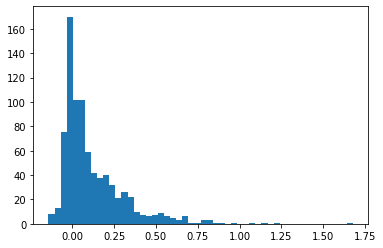

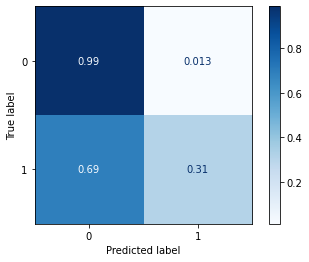

Confusion matrix:
 [[700   9]
 [ 79  36]]
Percentage classification error obtained from test set: 10.679611650485436%


In [22]:
X_test = test_df.iloc[:,0:20].to_numpy()
y_test = test_df.iloc[:,20].astype(int).to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)
#print(y_pred)
#print(y_test)
plt.hist(y_pred, bins=50)

# Use a threshold to select the probabilities that will determine class 0 or 1
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test.astype(int), y_pred.astype(int),
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [9]:
bank_mlr_results = {'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(bank_mlr_results)

df.to_csv('bank_mlr_results.csv')

<a id="references"></a>
## References:

Linear Regression:

- Classification in Python with Scikit-Learn and Pandas: https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas/